<a href="https://colab.research.google.com/github/HEDAETUL-ISLAM/mnist_tensorflow/blob/master/mnist_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install tensorflow


#Import data and lib

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#Loading data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



#Label data


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#For shape recognize


In [5]:
train_images.shape

(60000, 28, 28)

#For length


In [6]:
len(train_images)

60000

#For label


In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#Preprocess data and see


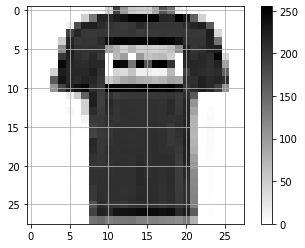

In [8]:
plt.figure()
plt.imshow(train_images[1], plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()

#Data process for newral network


In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

#Verify data set


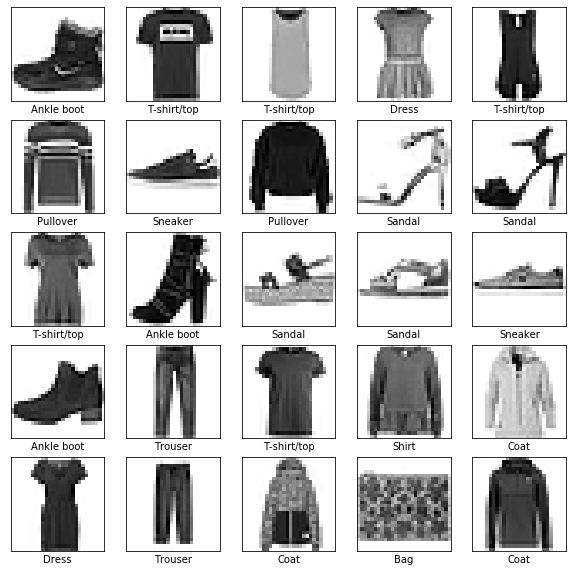

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(train_images[i], plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

#2 neural network layer setting

In [0]:
model = keras.Sequential([
                          # form image 2d array 28 by 28 size to 1 d array 28*28 size reform data
                          keras.layers.Flatten(input_shape=(28,28)),
                          # 128 neurons 
                          keras.layers.Dense(128, activation = 'relu'),
                          # 10 node softmax layer 
                          keras.layers.Dense(10)
])

# Now compile data 

In [0]:
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Training Section

In [13]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5039 - accuracy: 0.8234
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3787 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3430 - accuracy: 0.8743
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3176 - accuracy: 0.8836
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2985 - accuracy: 0.8895
Epoch 6/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2830 - accuracy: 0.8947
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2734 - accuracy: 0.8989
Epoch 8/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2599 - accuracy: 0.9034
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2532 - accuracy: 0.9052
Epoch 10/10
60

#Evaluation

In [14]:
test_loss, test_accu = model.evaluate(test_images, test_labels, verbose = 2)
print("test accuracy ", test_accu)

10000/10000 - 0s - loss: 0.3444 - accuracy: 0.8808
test accuracy  0.8808


#Prediction

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[1]

array([6.7333684e-05, 6.2260726e-12, 9.9262422e-01, 2.6302834e-08,
       3.5683147e-03, 4.3854529e-09, 3.7400131e-03, 2.1212428e-11,
       7.7152551e-10, 5.5794076e-16], dtype=float32)

#Confidence

In [19]:
np.argmax(predictions[0])

9

#Check classification is corret

In [20]:
test_labels[0]

9

#Graph

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Verifying our data

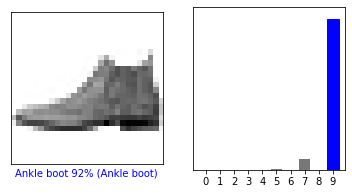

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

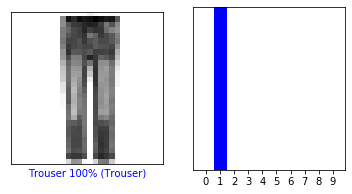

In [27]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#Plot all pic

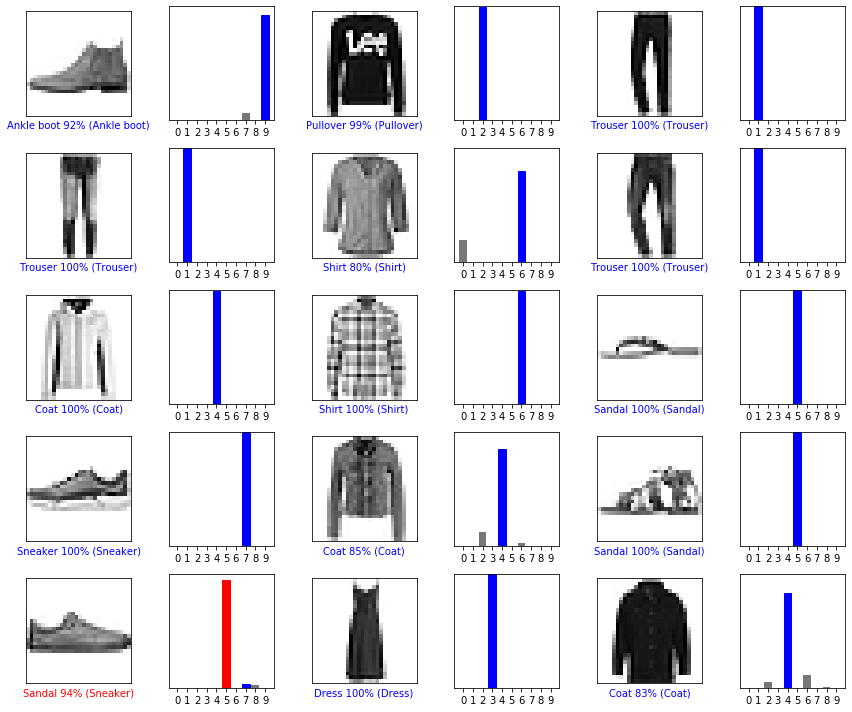

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Using trained model

In [30]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.7333618e-05 6.2260965e-12 9.9262422e-01 2.6302782e-08 3.5683082e-03
  4.3854445e-09 3.7400096e-03 2.1212428e-11 7.7152401e-10 5.5793864e-16]]


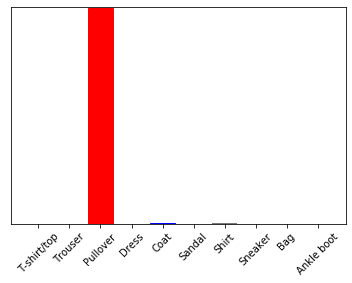

In [35]:
plot_value_array(10, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)